<a href="https://colab.research.google.com/github/suzanayounas/pipelines-dotnet-core/blob/master/ads_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing required library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#loading Libraries

In [ ]:
#import linear algebra & data manipulation libraries
import numpy as np
import pandas as pd


# Install LVQ library
!pip install sklvq
# Install Keras wrapper for scikit-learn
!pip install scikeras

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules for model selection and evaluation
from sklearn import model_selection
# Support Vector Classifier
from sklearn.svm import SVC
# Metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# Permutation feature importance
from sklearn.inspection import permutation_importance
# Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Generalized Learning Vector Quantization (LVQ)
from sklvq import GLVQ
# Keras neural network model
from keras.models import Sequential
# Neural network layers
from keras.layers import Dense
# Wrapper for Keras models to be used with scikit-learn
from scikeras.wrappers import KerasClassifier
# Utility to convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

# Data preprocessing
from sklearn.preprocessing import StandardScaler
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
# Metrics for model evaluation
from sklearn.metrics import accuracy_score

# Hyperparameter tuning tools
from sklearn.model_selection import StratifiedKFold
# Randomized and exhaustive search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Cross-validation score
from sklearn.model_selection import cross_val_score
# K-fold cross-validation
from sklearn.model_selection import KFold
# Encode target labels
from sklearn.preprocessing import LabelEncoder
# Create a pipeline of transformations and a final estimator
from sklearn.pipeline import Pipeline

# Operating system module
import os

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 2.9 MB/s eta 0:00:00


#Loading Dataset

In [ ]:
df = pd.read_csv('New DataSet.csv')

In [ ]:
df.head()

,Category,S.No,"Layout(Portrait-0,Landscape-1)","Gender(Male-0,Female-1,Both-2,None-3)","Language(Urdu-0,English-1,Both-2)","Size(Small-0,Medium-1,Large-2)","Crowded(Yes-1,No-0)","Visibility(Yes-1,No-0)","Contacts Details(Yes-1,No-0)","Discount((1-40)-0,(41-60)-1,(61-100)-2,(No Discount)-3)","Urgency(Yes-1,No-0)","Genre(Emotional-0,Funny-1,None-2)","Class Label(LV=0,V=1,MoreV=2,MostV=3)"
0,Food,1,1,1,1,1,0,0,0,3,0,2,0
1,Food,2,0,3,1,2,0,1,0,3,0,2,2
2,Food,3,0,1,1,2,0,1,1,3,0,2,3
3,Food,4,0,3,1,2,0,1,1,0,0,2,1
4,Food,5,1,3,1,2,0,1,1,3,0,2,3


#**Support Vector machine**


Support Vector Machine Model Accuracy (CV mean): 61.14%


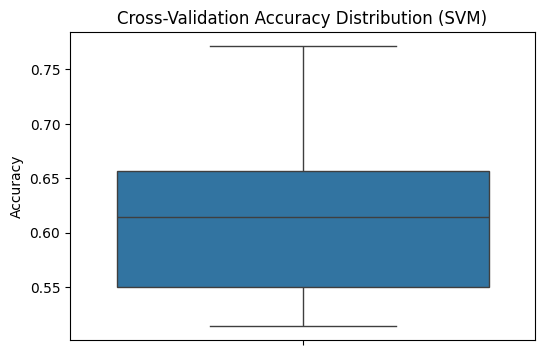

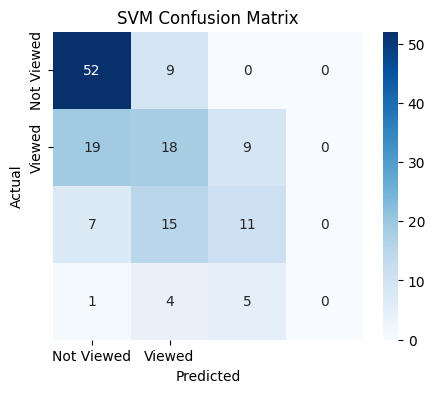

In [ ]:
# Loading Dataset

dataset = df.values
X = dataset[:, 3:-1].astype(float)
y = dataset[:, -1].astype(float)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=43
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM Model
svm_model = SVC(probability=True, random_state=43)

# Cross-validation
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=43)
cv_results = model_selection.cross_val_score(
    svm_model, X_train, y_train, cv=kfold, scoring="accuracy"
)
print("Support Vector Machine Model Accuracy (CV mean): %.2f%%" % (cv_results.mean() * 100))

# Plot CV Score Distribution
plt.figure(figsize=(6, 4))
sns.boxplot(cv_results)
plt.title("Cross-Validation Accuracy Distribution (SVM)")
plt.ylabel("Accuracy")
plt.show()

# Fit on full training set
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Viewed", "Viewed"],
            yticklabels=["Not Viewed", "Viewed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

#ANN

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Artificial Neural Network Accuracy: 57.80%


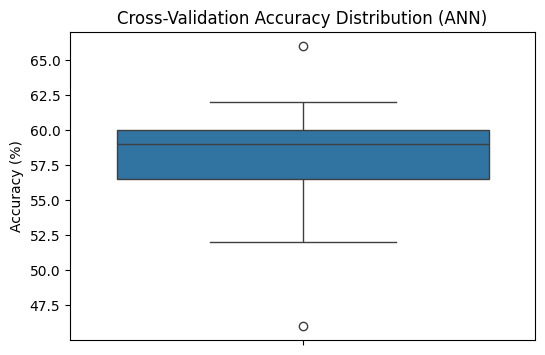

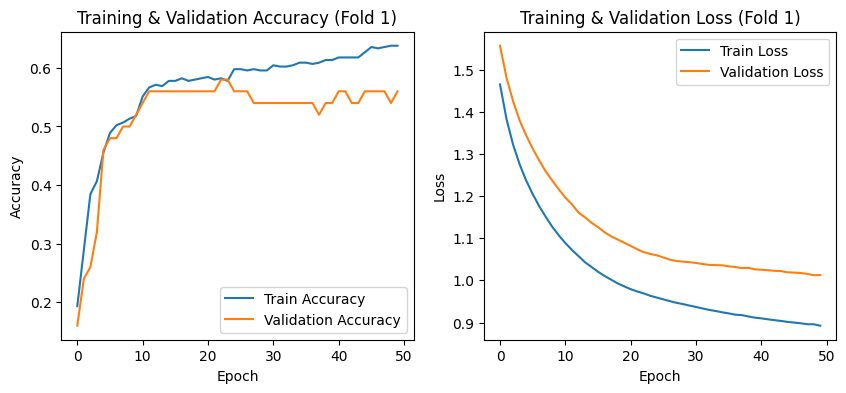

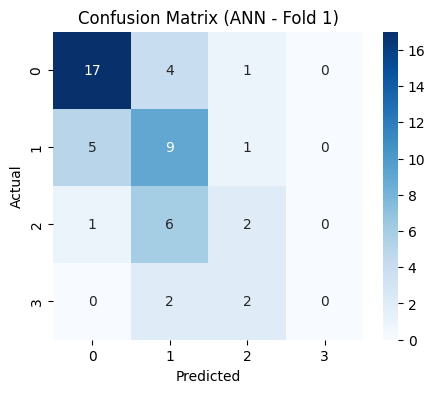

In [ ]:
# Load dataset (ensure df is loaded from previous cells)
dataset = df.values
X = dataset[:, 3:-1].astype(float)
Y = dataset[:, -1]

# Encode class values
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# One-hot encode target
dummy_y = to_categorical(encoded_Y)

# Feature scaling (helps ANN converge faster)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define ANN model
def ANN_model():
    model = Sequential()
    model.add(Dense(8, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(dummy_y.shape[1], activation='softmax'))
    return model

# Cross-validation setup
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cvscores = []
fold_no = 1

# To store one fold’s results for visualizations
history_example = None
y_test_example = None
y_pred_example = None

for train_index, test_index in kfold.split(X, encoded_Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = dummy_y[train_index], dummy_y[test_index]

    model = ANN_model()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0, validation_data=(X_test, y_test))

    scores = model.evaluate(X_test, y_test, verbose=0)
    cvscores.append(scores[1] * 100)

    if fold_no == 1:  # Save first fold’s details for visuals
        history_example = history
        y_test_example = np.argmax(y_test, axis=1)
        y_pred_example = np.argmax(model.predict(X_test), axis=1)
    fold_no += 1

# Accuracy output
print("Artificial Neural Network Accuracy: %.2f%%" % (np.mean(cvscores)))

# ---- VISUALIZATIONS ----

# 1. Cross-validation accuracy distribution
plt.figure(figsize=(6, 4))
sns.boxplot(cvscores)
plt.title("Cross-Validation Accuracy Distribution (ANN)")
plt.ylabel("Accuracy (%)")
plt.show()

# 2. Training history (Accuracy & Loss)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_example.history['accuracy'], label='Train Accuracy')
plt.plot(history_example.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (Fold 1)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_example.history['loss'], label='Train Loss')
plt.plot(history_example.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss (Fold 1)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 3. Confusion matrix
cm = confusion_matrix(y_test_example, y_pred_example)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (ANN - Fold 1)')
plt.show()



#**Naive Bayes**

Accuracy of Naive Bayes model: 64.00%


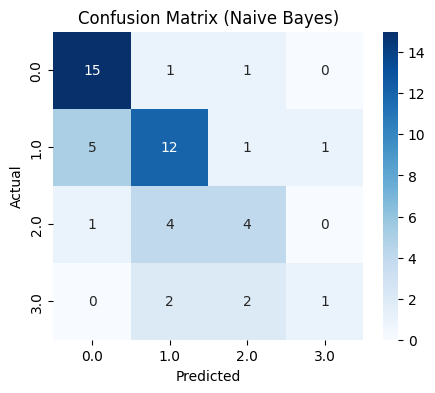


Classification Report (Naive Bayes):
               precision    recall  f1-score   support

         0.0       0.71      0.88      0.79        17
         1.0       0.63      0.63      0.63        19
         2.0       0.50      0.44      0.47         9
         3.0       0.50      0.20      0.29         5

    accuracy                           0.64        50
   macro avg       0.59      0.54      0.54        50
weighted avg       0.62      0.64      0.62        50



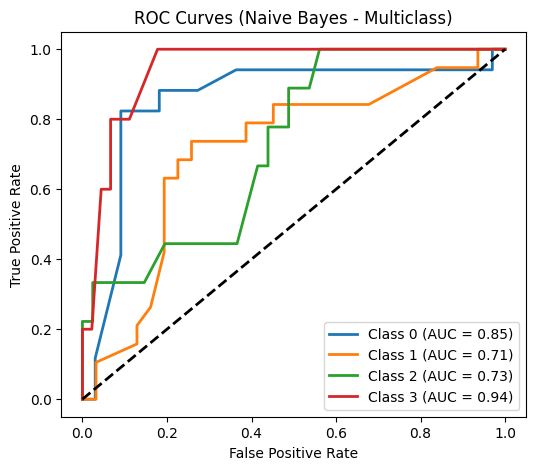

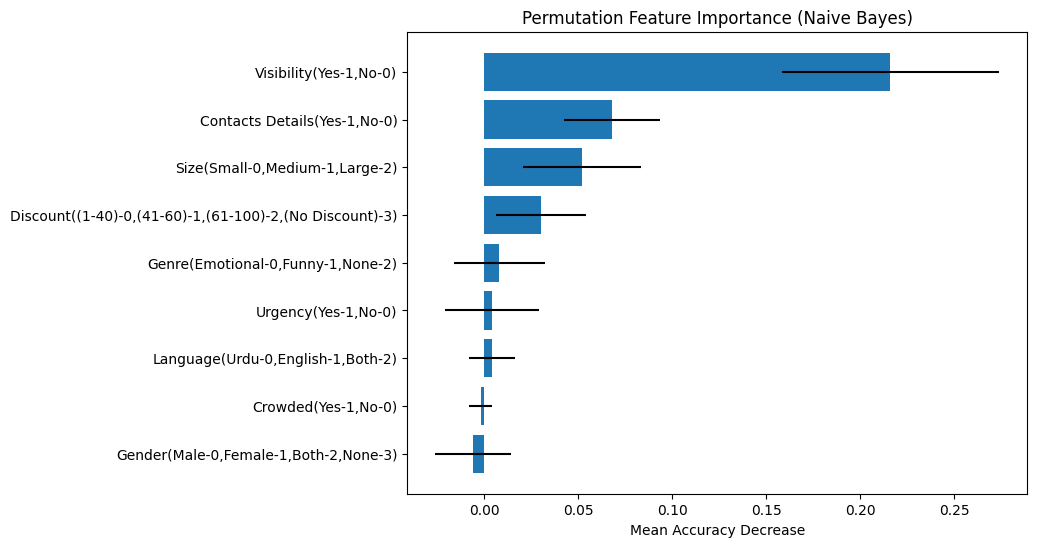

In [ ]:
# Load Dataset
dataset = df.values
X = dataset[:, 3:-1].astype(float)
y = dataset[:, -1].astype(float)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

# Naive Bayes model
gnb = GaussianNB()

# Training and predicting
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Accuracy Calculation
print("Accuracy of Naive Bayes model: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

# 2. Classification Report
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred))

# 3. ROC Curve & AUC (binary or multiclass one-vs-rest)
if len(np.unique(y)) == 2:
    y_proba = gnb.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Naive Bayes)")
    plt.legend(loc="lower right")
    plt.show()
else:
    # Multiclass ROC (One-vs-Rest)
    y_test_bin = to_categorical(y_test)
    y_pred_bin = gnb.predict_proba(X_test)
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(6, 5))
    for i in range(y_test_bin.shape[1]):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves (Naive Bayes - Multiclass)")
    plt.legend()
    plt.show()

# 4. Feature Importance (via permutation importance)
results = permutation_importance(gnb, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
sorted_idx = results.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), results.importances_mean[sorted_idx], xerr=results.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(df.columns[3:-1])[sorted_idx])
plt.xlabel("Mean Accuracy Decrease")
plt.title("Permutation Feature Importance (Naive Bayes)")
plt.show()

# ***Learning Vector Quantization***

Accuracy of Learning Vector Quantization model: 59.60%


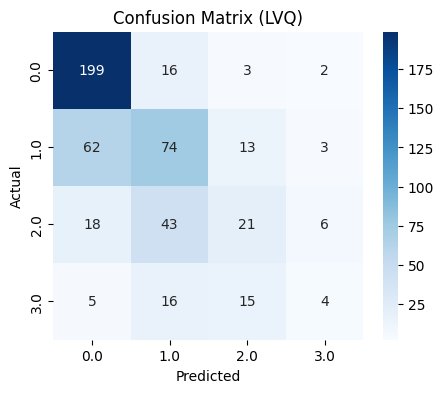


Classification Report (LVQ):
               precision    recall  f1-score   support

         0.0       0.70      0.90      0.79       220
         1.0       0.50      0.49      0.49       152
         2.0       0.40      0.24      0.30        88
         3.0       0.27      0.10      0.15        40

    accuracy                           0.60       500
   macro avg       0.47      0.43      0.43       500
weighted avg       0.55      0.60      0.56       500



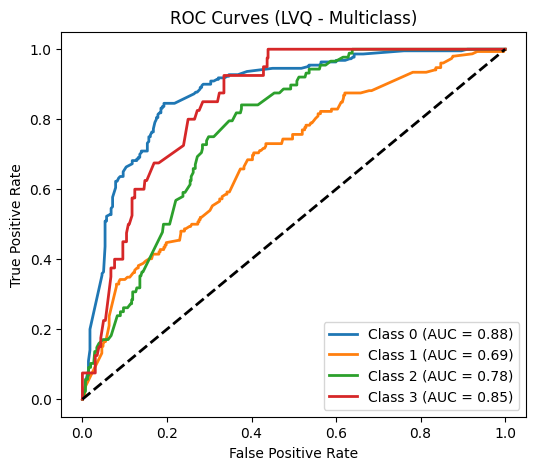

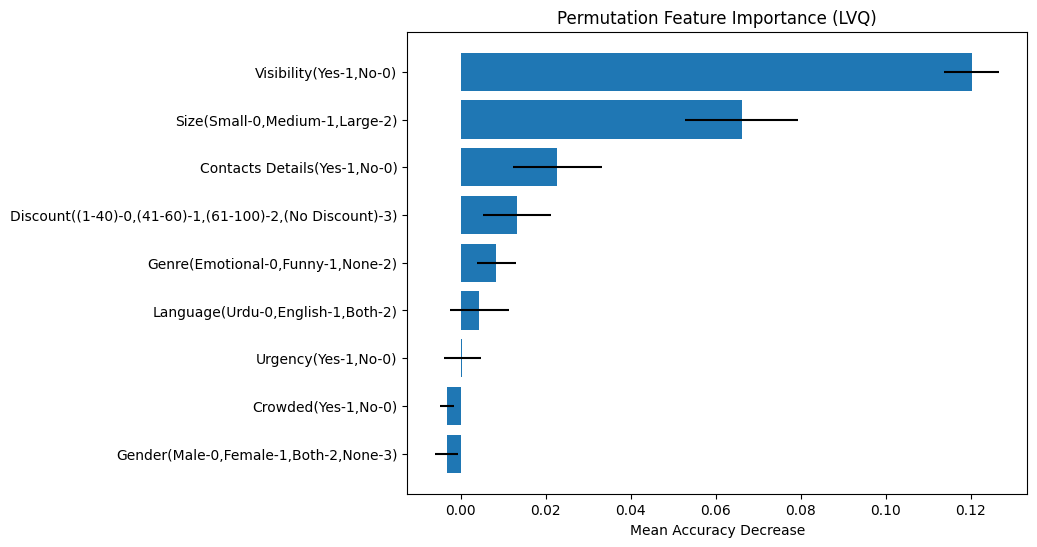

In [ ]:
# Load Dataset
dataset = df.values
X = dataset[:, 3:-1].astype(float)
y = dataset[:, -1].astype(float)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create LVQ model
model = GLVQ(
    distance_type="squared-euclidean",
    activation_type="swish",
    activation_params={"beta": 2},
    solver_type="steepest-gradient-descent",
    solver_params={"max_runs": 20, "step_size": 0.1},
)

# Fit LVQ model
model.fit(X_scaled, y)

# Predictions
y_pred = model.predict(X_scaled)

# Accuracy
print("Accuracy of Learning Vector Quantization model: %.2f%%" % (accuracy_score(y, y_pred) * 100))

# ---- VISUALIZATIONS ----

# 1. Confusion Matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LVQ)')
plt.show()

# 2. Classification Report
print("\nClassification Report (LVQ):\n", classification_report(y, y_pred))

# 3. ROC & AUC
if len(np.unique(y)) == 2:
    y_proba = model.predict_proba(X_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (LVQ)")
    plt.legend(loc="lower right")
    plt.show()
else:
    y_test_bin = to_categorical(y)
    y_pred_bin = model.predict_proba(X_scaled)
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(6, 5))
    for i in range(y_test_bin.shape[1]):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves (LVQ - Multiclass)")
    plt.legend()
    plt.show()

# 4. Permutation Feature Importance
results = permutation_importance(model, X_scaled, y, scoring='accuracy', n_repeats=10, random_state=42)
sorted_idx = results.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), results.importances_mean[sorted_idx], xerr=results.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(df.columns[3:-1])[sorted_idx])
plt.xlabel("Mean Accuracy Decrease")
plt.title("Permutation Feature Importance (LVQ)")
plt.show()
